<a href="https://colab.research.google.com/github/Lefifikea/Sendy-Logistics-Challenge/blob/master/Prelim_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# New Section

In [0]:
train = pd.read_csv('Train.csv')

In [0]:
test = pd.read_csv('Test.csv')

In [0]:
riders = pd.read_csv('Riders.csv')

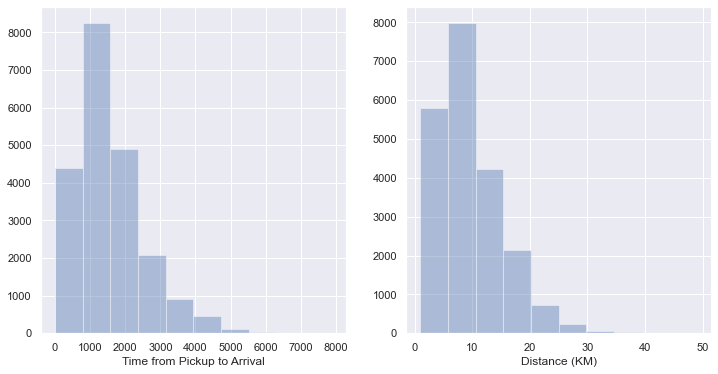

In [0]:
sns.set()
f, axes = plt.subplots(1, 2,figsize=(12,6))


sns.distplot(train['Time from Pickup to Arrival'], kde=False, ax=axes[0], bins = 10)
sns.distplot(train['Distance (KM)'], kde=False, ax = axes[1], bins = 10)

plt.show()

##most deliveries took around 1000 seconds with  most delivery distances being around 10KM
##skewed to the right. proven by mean > median

In [0]:
print('mean of delivery time:', round(train['Time from Pickup to Arrival'].mean()),2)
print('median of delivery time:', train['Time from Pickup to Arrival'].median())

mean of delivery time: 1557 2
median of delivery time: 1369.0


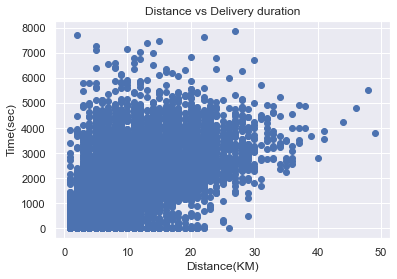

In [0]:
plt.scatter(train['Distance (KM)'],train['Time from Pickup to Arrival'])
plt.title('Distance vs Delivery duration')
plt.xlabel('Distance(KM)')
plt.ylabel('Time(sec)')

plt.show()

## preliminary removal outliers

In [0]:
## some of the values in the variable/reponse column do not make sense and therefore must be removed.
## the values are removed on the assumption that the bikes only do deliveries in and around the city where there is traffic,
## and stop signs and traffic light, etc, and the bikes are small engined and therefore the average speed that is 60km/hr
train_copy = train.copy()
# It would take about 1200 seconds to cover 20Km
train_copy.drop(train_copy[(train_copy['Time from Pickup to Arrival'] <= 1200) & (train_copy['Distance (KM)'] > 20)].index, 
                inplace = True)

# It would take about 600 seconds to cover 10Km
train_copy.drop(train_copy[(train_copy['Time from Pickup to Arrival'] <= 600) & (train_copy['Distance (KM)'] > 10)].index, 
                inplace = True)

# It would take about 300 seconds to cover 5Km
train_copy.drop(train_copy[(train_copy['Time from Pickup to Arrival'] < 300) & (train_copy['Distance (KM)'] > 5)].index,
                inplace = True)
# it takes a minute to cover a kilometer
train_copy.drop(train_copy[(train_copy['Time from Pickup to Arrival'] < 60) & (train_copy['Distance (KM)'] > 1)].index, 
                inplace = True)


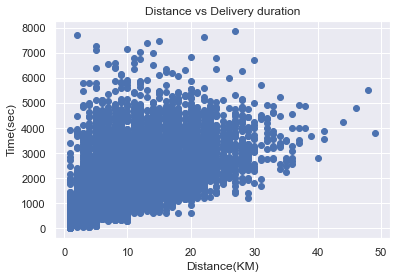

In [0]:
plt.scatter(train_copy['Distance (KM)'],train_copy['Time from Pickup to Arrival'])
plt.title('Distance vs Delivery duration')
plt.xlabel('Distance(KM)')
plt.ylabel('Time(sec)')

plt.show()

some of the outliers have been removed as seen on the scatter plot above.

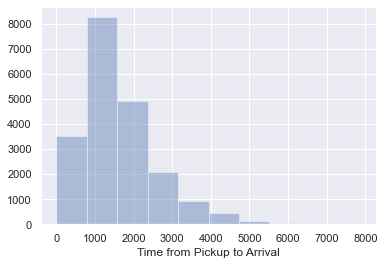

In [0]:
sns.set()
#f, axes = plt.subplots(1, 2,figsize=(12,6))


sns.distplot(train_copy['Time from Pickup to Arrival'], kde=False, bins = 10)
#sns.distplot(train_copy['Distance (KM)'], kde=False, ax = axes[1], bins = 10)

plt.show()

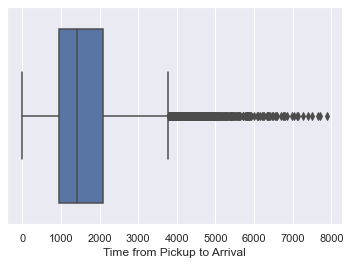

In [0]:
sns.boxplot(train_copy['Time from Pickup to Arrival'], orient = 'h')
plt.show()

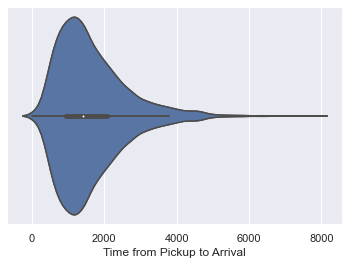

In [0]:
sns.violinplot(train_copy['Time from Pickup to Arrival'], orient = 'h')
plt.show()

it seems as if the response variable has a log-normal distribution, as seen from the histogram, the boxplot and the violinplot, which might indicate that we need to transform the data to a normal distrubution using log functions

In [0]:
train_copy.shape

(20343, 29)

In [0]:
riders.shape

(960, 5)

In [0]:
merged_df = train_copy.merge(riders, how = 'inner', on = 'Rider Id') 

In [0]:
merged_df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,...,540.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000
mean,2.743548,15.645087,3.240869,15.645234,3.241017,15.645234,3.241017,15.645234,3.241017,15.645234,...,8.008889,-1.281242,36.811019,-1.282601,36.811302,1620.144669,1645.559210,973.147766,13.893383,340.678022
std,0.634175,8.793437,1.568790,8.793406,1.568720,8.793406,1.568720,8.793406,1.568720,8.793406,...,17.260697,0.030566,0.037708,0.035030,0.044967,957.239862,1505.119569,636.397052,0.906876,404.082996
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,1.000000,-1.300921,36.783473,-1.301446,36.785661,938.000000,557.000000,495.000000,13.700000,60.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,2.900000,-1.279395,36.806490,-1.284467,36.807990,1411.000000,1209.000000,872.000000,14.000000,158.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,...,5.000000,-1.257147,36.828454,-1.261002,36.829250,2076.500000,2273.000000,1218.000000,14.300000,504.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


In [0]:
#merged_df.info()

In [0]:
daily_orders = merged_df.groupby('Pickup - Weekday (Mo = 1)', as_index = False)[['Pickup Lat']].count()  

In [0]:
daily_orders.rename(columns = {'Pickup - Weekday (Mo = 1)':'Weekday (Mo = 1)', 'Pickup Lat':'Total Deliveries'}, inplace = True)


In [0]:
daily_orders['Proportion(%)'] = round((daily_orders['Total Deliveries']/daily_orders['Total Deliveries'].sum())*100,2)
daily_orders

,Weekday (Mo = 1),Total Deliveries,Proportion(%)
0,1,3634,17.86
1,2,3810,18.73
2,3,3653,17.96
3,4,4050,19.91
4,5,3840,18.88
5,6,1173,5.77
6,7,183,0.90


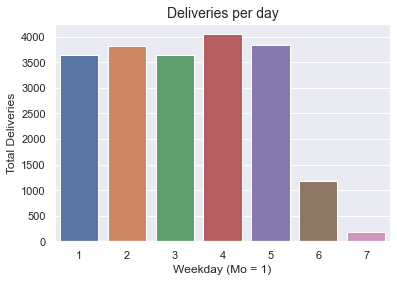

In [0]:
sns.barplot(x = 'Weekday (Mo = 1)', y = 'Total Deliveries', data = daily_orders).set_title('Deliveries per day', fontsize=14)

plt.show()

the table and barplot above show the number of deliveries as per day with saturday and sunday having the least number of deliveries.

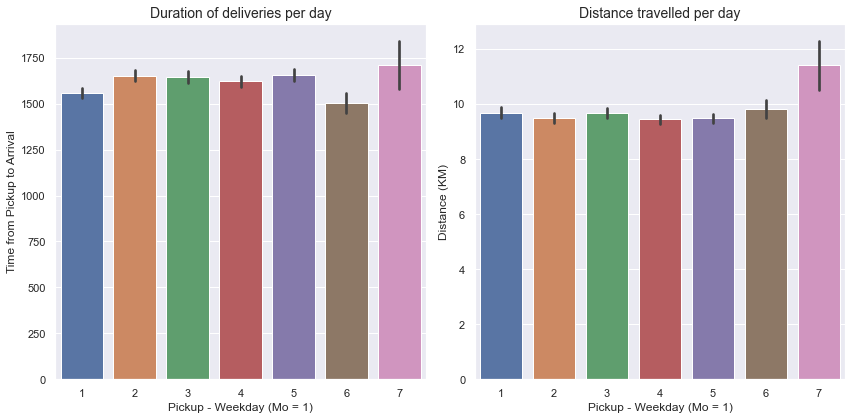

In [0]:
f, axes = plt.subplots(1, 2,figsize=(12,6))

sns.barplot(x = 'Pickup - Weekday (Mo = 1)', y = 'Time from Pickup to Arrival', data = merged_df, 
            ax = axes[0]).set_title('Duration of deliveries per day', fontsize=14)
sns.barplot(x = 'Pickup - Weekday (Mo = 1)', y = 'Distance (KM)', data = merged_df, 
            ax = axes[1]).set_title('Distance travelled per day', fontsize=14)


f.tight_layout()
plt.show()


The barplots above show the distances and the delivery times per day of the week.
seems as if the longest delivery time is on sundays, which is surprising considering that there are a few traffic conditions 
to consider on a sunday. but again the longest distance is on a sunday which might explain the longer delivery time

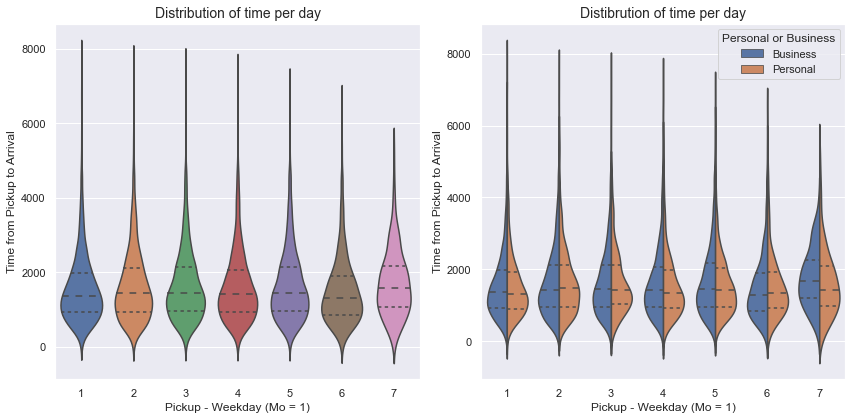

In [0]:
f, axes = plt.subplots(1, 2,figsize=(12,6))

sns.violinplot(x = 'Pickup - Weekday (Mo = 1)', y = 'Time from Pickup to Arrival', inner = 'quartile',data = merged_df,
               ax=axes[0]).set_title('Distribution of time per day', fontsize=14)
sns.violinplot(x = 'Pickup - Weekday (Mo = 1)', y = 'Time from Pickup to Arrival', inner = 'quartile',data = merged_df,
               hue ='Personal or Business',split = True, ax=axes[1]).set_title('Distibrution of time per day', fontsize=14)
f.tight_layout()
plt.show()



Equal distribution of delivery time and almost equal number of deliveries per day of time throughout the week days, except on saturday and sundays which see far less No. of deliveries

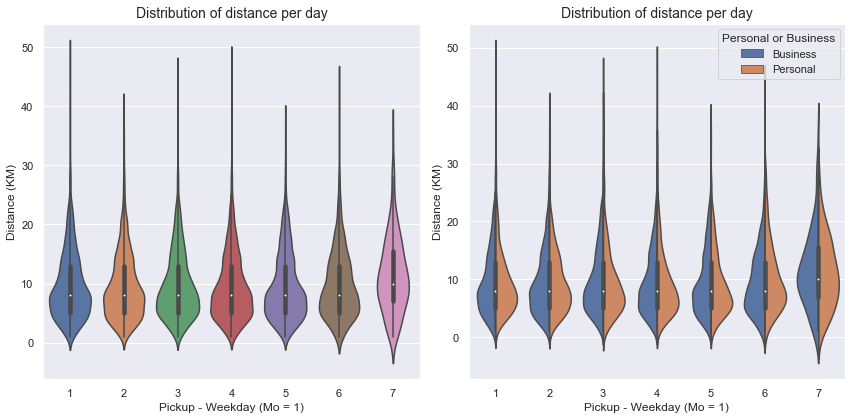

In [0]:
f, axes = plt.subplots(1, 2,figsize=(12,6))

sns.violinplot(x = 'Pickup - Weekday (Mo = 1)', y = 'Distance (KM)', 
               data = merged_df, ax=axes[0]).set_title('Distribution of distance per day', fontsize=14)
sns.violinplot(x = 'Pickup - Weekday (Mo = 1)', y = 'Distance (KM)', 
               data = merged_df,hue ='Personal or Business',
               split = True, ax=axes[1]).set_title('Distribution of distance per day', fontsize=14)
f.tight_layout()
plt.show()


equal distribution of distance travelled and almost equal number of deliveries per day of time throughout the week days, except on saturday and sundays which see far less No. of deliveries

In [0]:
merged_df['Personal or Business'].value_counts()

Business    16545
Personal     3798
Name: Personal or Business, dtype: int64

In [0]:
order_type = merged_df.groupby('Personal or Business')[['Order No']].count()

order_type['Proportion(%)'] = round((order_type['Order No']/order_type['Order No'].sum())*100,2)
order_type.rename(columns = {'Personal or Business':'Delivery type', 'Order No':'No. of Orders'}, inplace = True)



In [0]:
order_type

,No. of Orders,Proportion(%)
Personal or Business,,
Business,16545,81.33
Personal,3798,18.67


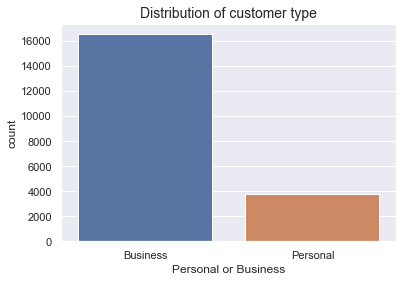

In [0]:
sns.countplot(x = 'Personal or Business', data =merged_df).set_title('Distribution of customer type', fontsize=14)
plt.show()

##

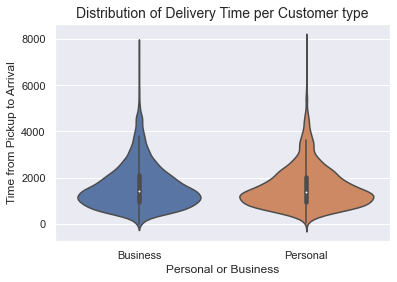

In [0]:
sns.violinplot(x = 'Personal or Business', y = 'Time from Pickup to Arrival', 
               data = merged_df).set_title('Distribution of Delivery Time per Customer type', fontsize=14)
sns.set()
plt.show()

more than 80% of the type of order or delivery is business as shown on the table and countplot. so the chances of this predictor variable having an impact on the the model are very slim and it might have to be dropped. also, both customer types have the same distribution of of delivery time, with similar summary statistics and further supporting the idea that the feature must be dropped as it will have no effect on the accuracy of the model.

In [0]:
merged_df['Platform Type'].value_counts()

3    17217
1     2131
2      975
4       20
Name: Platform Type, dtype: int64

In [0]:
Platform_type_df = merged_df.groupby('Platform Type')[['Order No']].count()

Platform_type_df['Proportion(%)'] = round((Platform_type_df['Order No']/Platform_type_df['Order No'].sum())*100,2)
Platform_type_df.rename(columns = {'Order No':'No. of Orders'}, inplace = True)
Platform_type_df

,No. of Orders,Proportion(%)
Platform Type,,
1,2131,10.48
2,975,4.79
3,17217,84.63
4,20,0.10


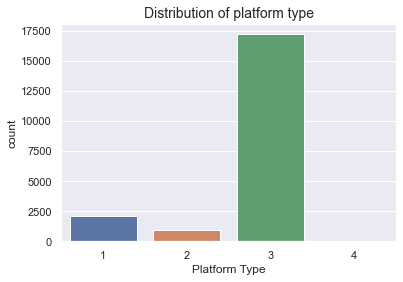

In [0]:
sns.countplot(x = 'Platform Type', data =merged_df ).set_title('Distribution of platform type', fontsize=14)
plt.show()

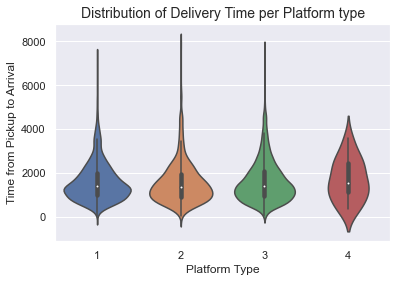

In [0]:
sns.violinplot(x = 'Platform Type', y = 'Time from Pickup to Arrival', 
               data = merged_df).set_title('Distribution of Delivery Time per Platform type', fontsize=14)
sns.set()
plt.show()

similar to the type of order, more than 80% of the platform type is type 3 as shown on the table and countplot. so the chances of this predictor variable having an impact on the the model must be investigated further as shown on the figures below this paragraph. Platform type 4 has far less orders than all the other platforms and also has no outliers which is most probably due to the small sample that falls under platform 4.

C:\Users\kea pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


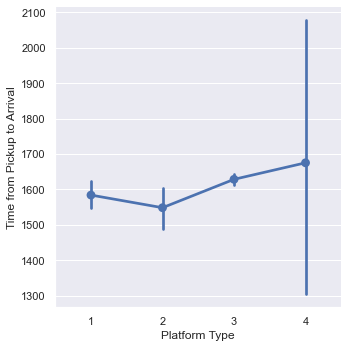

In [0]:
sns.factorplot('Platform Type','Time from Pickup to Arrival', data = merged_df)

plt.show()

C:\Users\kea pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


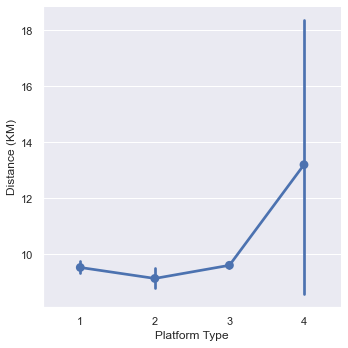

In [0]:
sns.factorplot('Platform Type','Distance (KM)', data = merged_df)
plt.show()

on the first factorplot, delivery time does not differ that much across the 4 different platform types with platform 4 having the longest delivery time. the second plot suggests that most long distance deliveries were made or ordered through platform 4. Longer distances mean more factors will affect the delivery time and must be accounted for and also can result in less prediction accuracies over those long distances. One thing to also notice is that platform has the least number of orders as stated above but has the longest delivery time and longest delivery distance. This might suggest that platform 4 is used for longer deliveries which occur less frequently than the shorter distance more freqeunt deliveries. therefore platform type is important for the purposes of predicting delivery type.

## temperature

In [0]:
null_percentage = round((float(merged_df['Temperature'].isna().sum()/len(merged_df['Temperature'])*100)),2)
print(null_percentage, '%')

20.37 %


In [0]:
df_temp = merged_df.dropna()

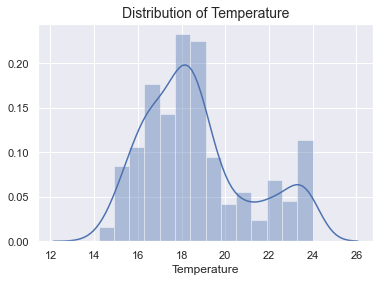

In [0]:
sns.distplot(df_temp.Temperature, kde=True).set_title('Distribution of Temperature', fontsize=14)
plt.show()

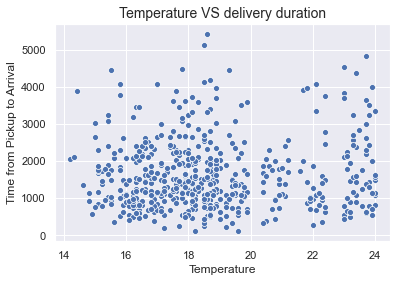

In [0]:
sns.scatterplot('Temperature','Time from Pickup to Arrival'
                ,data = df_temp).set_title('Temperature VS delivery duration', fontsize=14)
plt.show()

##no relationship between temperature and time it takes to deliver

In [0]:
df_temp[['Time from Pickup to Arrival','Temperature']].corr()

,Time from Pickup to Arrival,Temperature
Time from Pickup to Arrival,1.00000,0.06249
Temperature,0.06249,1.00000


temperature has approximately 20% of missing values, and of those values that are there, there seems to be a low correlation between it and the delivery times as seen in the table above.

## precipitation

In [0]:
null_percentage_rain = round(
    (float(merged_df['Precipitation in millimeters'].isna().sum()/len(merged_df['Precipitation in millimeters'])*100)),2)
print(null_percentage_rain, '%')

97.35 %


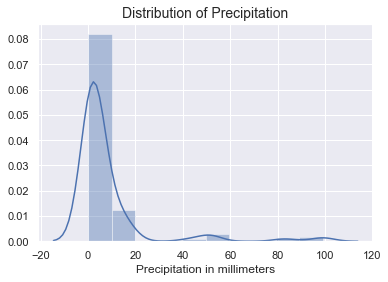

In [0]:
sns.distplot(df_temp['Precipitation in millimeters'], kde=True, bins = 10).set_title('Distribution of Precipitation', fontsize=14)
plt.show()

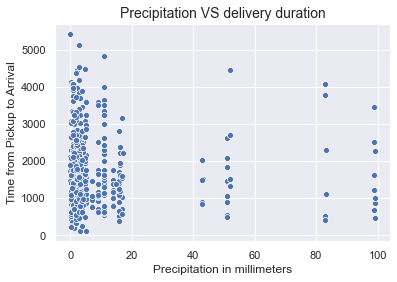

In [0]:
sns.scatterplot('Precipitation in millimeters','Time from Pickup to Arrival'
                ,data = df_temp).set_title('Precipitation VS delivery duration', fontsize=14)
plt.show()


In [0]:
df_temp[['Time from Pickup to Arrival','Precipitation in millimeters']].corr()

,Time from Pickup to Arrival,Precipitation in millimeters
Time from Pickup to Arrival,1.000000,0.015432
Precipitation in millimeters,0.015432,1.000000


Precipitation has approximately 97% of missing values, and of those values that are there, there seems to be a low correlation between it and the delivery times as seen in the table above.From the histogram, of the values of precipitation which are provided with, the majority of them are around 10mm. Even if we were to replace the missing values, we would use the mean/median which would still be around 10mm, and therefore the majority of the imputed values will be around 10mm and therefore the feature variable itself would have a minimal impact on the performance of our model.

## Driver features

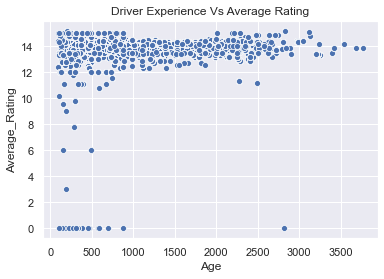

In [0]:

sns.scatterplot('Age','Average_Rating', data = merged_df).set_title('Driver Experience Vs Average Rating', fontsize=12)

plt.show()

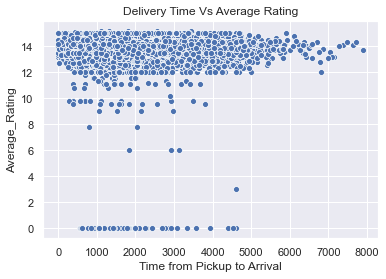

In [0]:
sns.scatterplot('Time from Pickup to Arrival','Average_Rating', 
                data = merged_df).set_title('Delivery Time Vs Average Rating', fontsize=12)
plt.show()




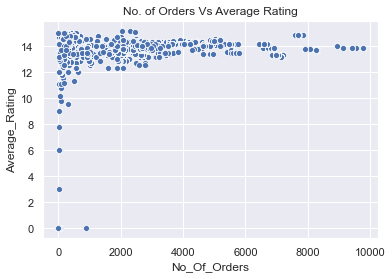

In [0]:
sns.scatterplot('No_Of_Orders','Average_Rating', 
                data = merged_df).set_title('No. of Orders Vs Average Rating', fontsize=12)
plt.show()

In [0]:
print('min and max driver rating:', merged_df['Average_Rating'].min(), ',', merged_df['Average_Rating'].max())

min and max driver rating: 0.0 , 15.2


In [0]:
driver ratings seem to be high regardless of the experience of the driver or the time that a driver took when doing the delivery. Also, we do not have a reference point for the the rating, i.e. we do not know the highest possible rating that a driver can get, we can only look at the ratings relatively and not absolutely. Refer to the three above scatter plots for the information. The ratings would need to be standardized in some form so as to get meaning info from it, i.e. feature engineering is needed.